<a href="https://colab.research.google.com/github/ChahineBA/Spaceship-Titanic/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1022]:
#Load the Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score,f1_score, confusion_matrix
from sklearn.impute import SimpleImputer,KNNImputer
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder

# Data

In [1023]:
#Reading the datasets:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
sample = pd.read_csv('/content/sample_submission.csv')

In [1024]:
#Training Dataset
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [1025]:
#Testing Dataset
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [1026]:
#sample
sample

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


# Data Description

*   **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
*  **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
* **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
* **Age** - The age of the passenger.
* **VIP** - Whether the passenger has paid for special VIP service during the voyage.
* **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
Name - The first and last names of the passenger.
* **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [1027]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [1028]:
train_df.describe(include="O")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [1029]:
#Info on the dataset:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [1030]:
#Missing Data
missing = train_df.isnull().sum()
print(missing)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [1031]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data Manipulation & Feature Engineering

In [1032]:
#Splitting the Cabin Column for Training Dataset:
train_df[["cabin_code","id_cabin","cabin_sector"]] = train_df["Cabin"].str.split("/", n=2, expand=True)
#Splitting the Cabin Column for Testing Dataset:
test_df[["cabin_code","id_cabin","cabin_sector"]] = test_df["Cabin"].str.split("/", n=2, expand=True)
train_df.head(4)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_code,id_cabin,cabin_sector
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S


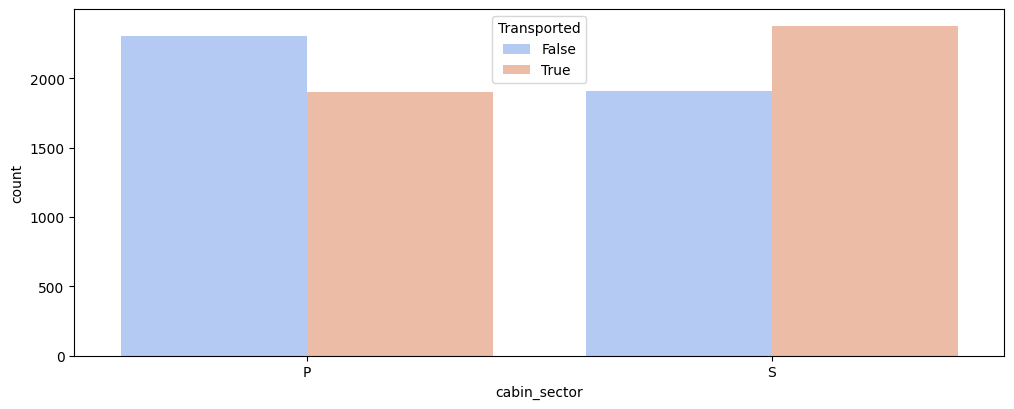

In [1033]:
#plotting the Cabin Column:
plt.figure(figsize=(12, 4.5))
_= sns.countplot(data=train_df, x="cabin_sector", hue="Transported", palette="coolwarm")

In [1034]:
#Transportation Percentage per cabin_code:
result = train_df.groupby('cabin_code')['Transported'].mean() * 100
result

cabin_code
A    49.609375
B    73.427471
C    68.005355
D    43.305439
E    35.730594
F    43.987115
G    51.621727
T    20.000000
Name: Transported, dtype: float64

====> The Transportation Depends on the **cabin Code**

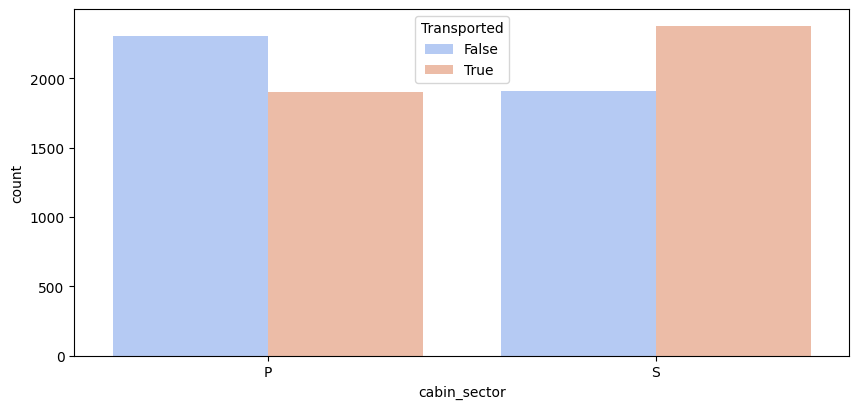

In [1035]:
#Cabin_Sector
plt.figure(figsize=(10, 4.5))
_= sns.countplot(data=train_df, x="cabin_sector", hue="Transported", palette="coolwarm")

In [1036]:
#Transportation Percentage per cabin_sector:
result = train_df.groupby('cabin_sector')['Transported'].mean() * 100
result

cabin_sector
P    45.126010
S    55.503731
Name: Transported, dtype: float64

====> The Transportation Depends on the **cabin Sector**

In [1037]:
#Deleting the Cabin column & Organizing the Dataset:
train_df.drop(columns=['Cabin','id_cabin'], inplace=True)
pop_id_cabin = train_df.pop("cabin_code")
train_df.insert(3, 'cabin_code', pop_id_cabin)
pop_id_cabin = train_df.pop("cabin_sector")
train_df.insert(3, 'cabin_sector', pop_id_cabin)
#######################################################
#Test:
#Deleting the Cabin column & Organizing the Dataset:
test_df.drop(columns=['Cabin','id_cabin'], inplace=True)
pop_id_cabin = test_df.pop("cabin_code")
test_df.insert(3, 'cabin_code', pop_id_cabin)
pop_id_cabin = test_df.pop("cabin_sector")
test_df.insert(3, 'cabin_sector', pop_id_cabin)

In [1038]:
#Tranforming the target:
train_df['Transported'] = train_df['Transported'].map({True: 1,False:0})

In [1039]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,cabin_sector,cabin_code,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,P,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,S,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,S,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,S,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,S,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


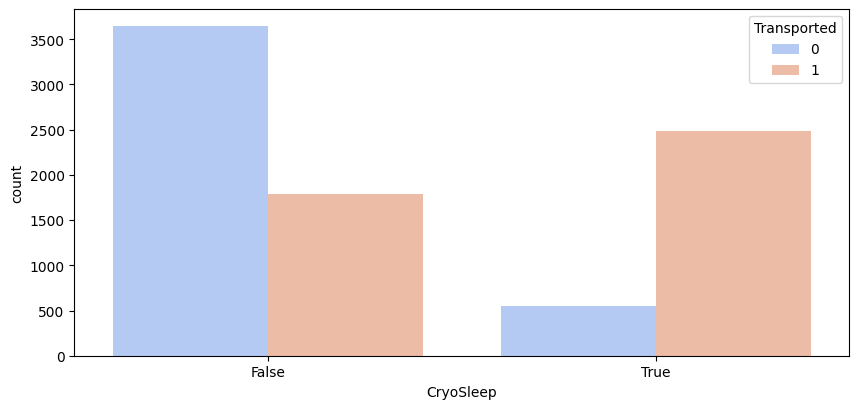

In [1040]:
#CryoSleep
plt.figure(figsize=(10, 4.5))
_= sns.countplot(data=train_df, x="CryoSleep", hue="Transported", palette="coolwarm")

In [1041]:
#Transportation Percentage per CryoSleep:
result = train_df.groupby('CryoSleep')['Transported'].mean() * 100
result

CryoSleep
False    32.892076
True     81.758314
Name: Transported, dtype: float64

===> If the the **Cryosleep** is **True** it's more likely that he will be **Transported**

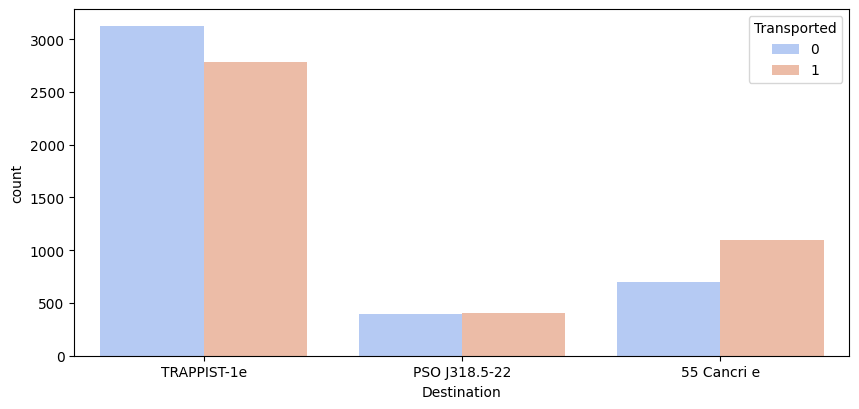

In [1042]:
#Destination
plt.figure(figsize=(10, 4.5))
_= sns.countplot(data=train_df, x="Destination", hue="Transported", palette="coolwarm")

In [1043]:
#Transportation Percentage per Destination:
result = train_df.groupby('Destination')['Transported'].mean() * 100
result

Destination
55 Cancri e      61.000000
PSO J318.5-22    50.376884
TRAPPIST-1e      47.117498
Name: Transported, dtype: float64

===> If the Destination is **55 Cancri e** it's more likely that he will be transported

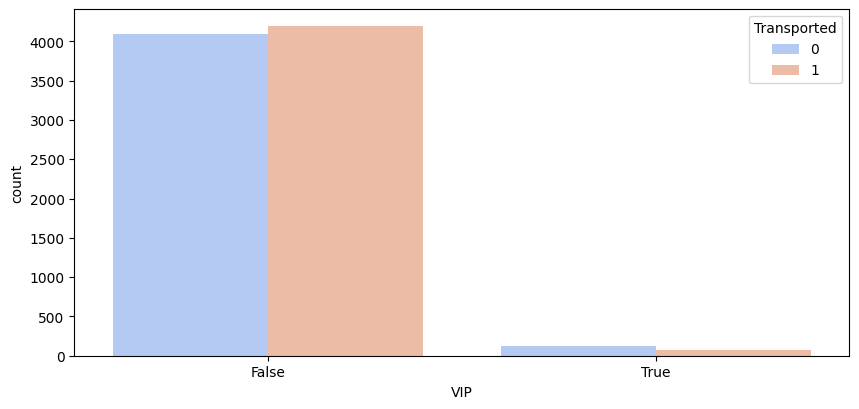

In [1044]:
#VIP
plt.figure(figsize=(10, 4.5))
_= sns.countplot(data=train_df, x="VIP", hue="Transported", palette="coolwarm")

In [1045]:
#Transportation Percentage per VIP:
result = train_df.groupby('VIP')['Transported'].mean() * 100
result

VIP
False    50.633217
True     38.190955
Name: Transported, dtype: float64

====> if the passenger is **not VIP** he is more likely to **not be Transported**

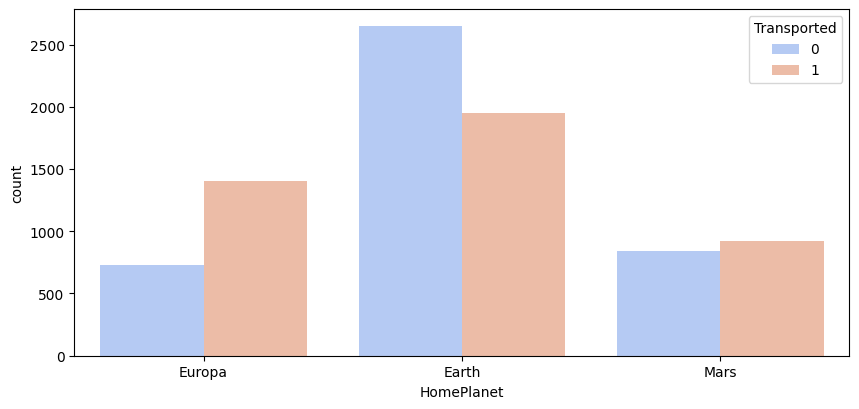

In [1046]:
#HomePlanet
plt.figure(figsize=(10, 4.5))
_= sns.countplot(data=train_df, x="HomePlanet", hue="Transported", palette="coolwarm")

In [1047]:
#Transportation Percentage per HomePlanet:
result = train_df.groupby('HomePlanet')['Transported'].mean() * 100
result

HomePlanet
Earth     42.394611
Europa    65.884561
Mars      52.302445
Name: Transported, dtype: float64

===> If the passenger is from **Europa** he is more likely to be **Transported**

In [1048]:
#Removing Unnecessary Columns:
train_df=train_df.drop(['Name','PassengerId'],axis=1)
#Testing Dataset:
test_df=test_df.drop(['Name'],axis=1)

In [1049]:
from sklearn.preprocessing import LabelEncoder

# Classification of Age in train_df
train_df['AgeGroup'] = pd.cut(train_df.Age, bins=[0, 5, 12, 18, 50, 150], labels=['Baby','Child','Teen', 'Adult','Elderly'])
label_encoder_train = LabelEncoder()
train_df['AgeGroup'] = label_encoder_train.fit_transform(train_df['AgeGroup'])

# Classification of Age in test_df
test_df['AgeGroup'] = pd.cut(test_df.Age, bins=[0, 5, 12, 18, 50, 150], labels=['Baby','Child','Teen', 'Adult','Elderly'])
label_encoder_test = LabelEncoder()
test_df['AgeGroup'] = label_encoder_test.fit_transform(test_df['AgeGroup'])

In [1050]:
train_df.head()

,HomePlanet,CryoSleep,cabin_sector,cabin_code,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,AgeGroup
0,Europa,False,P,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0
1,Earth,False,S,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0
2,Europa,False,S,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,3
3,Europa,False,S,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0
4,Earth,False,S,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,4


In [1051]:
print(train_df.isnull().sum())

HomePlanet      201
CryoSleep       217
cabin_sector    199
cabin_code      199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
AgeGroup          0
dtype: int64


# Splitting Data

In [1052]:
X = train_df.drop(['Transported'],axis=1)
y = train_df["Transported"]

In [1053]:
X

,HomePlanet,CryoSleep,cabin_sector,cabin_code,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,AgeGroup
0,Europa,False,P,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,S,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,0
2,Europa,False,S,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,3
3,Europa,False,S,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,False,S,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,P,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,True,S,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,4
8690,Earth,False,S,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,0
8691,Europa,False,S,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0


In [1054]:
#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [1055]:
#Separate categorical and numerical
cat_feat = np.array([coluna for coluna in X_train.columns if X_train[coluna].dtype.name == 'object'])
num_feat = np.array([coluna for coluna in X_train.columns if coluna not in cat_feat])

In [1056]:
#Categorical and numerical pipelines
cat_pipe = Pipeline([("imputer_cat", SimpleImputer(strategy="most_frequent")),("encoder", OrdinalEncoder()),
                    ])
num_pipe = Pipeline([("imputer_num", KNNImputer(n_neighbors=3))])

In [1057]:
#Using ColumnTransformer
transformer = ColumnTransformer([("num_trans", num_pipe, num_feat),
                            ("cat_trans", cat_pipe, cat_feat)])

In [1058]:
# ".fit_transform" in train data"
# ".transform" in test data"
X_train_transformed = transformer.fit_transform(X_train, y_train)
X_test_transformed = transformer.transform(X_test)

# Model

In [1059]:
models = []

models.append(("xgb",xgb.XGBClassifier()))
models.append(("xgbgblinear",xgb.XGBClassifier(booster="gblinear")))
models.append(("LGBM",LGBMClassifier(verbose=-1)))


print(models)

results = dict()

for  name, model in models:
    skf = StratifiedKFold(n_splits = 5, random_state=None)
    cv_results = cross_val_score(model,X_train_transformed,y_train,cv=skf, scoring="accuracy")
    results[name]= (cv_results.mean(), cv_results.std())

print("name     results.mean     results.std")

for key,value in results.items():
    print(key,value)

[('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)), ('xgbgblinear', XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
         

In [1060]:
lgbmc = LGBMClassifier()

# Hyperparameter Tuning

In [1061]:
lgbm_params = {"n_estimators":[100,200,300],
               "learning_rate":[0.01,0.05,0.1,0.3],
               "num_leaves":[20,50,80,100],
              "verbose":[-1]}

In [1062]:
grid_search = GridSearchCV (estimator = lgbmc,
                            param_grid = lgbm_params,
                            n_jobs=-1,
                            cv = 5,
                            scoring="accuracy",
                           error_score='raise')

In [1063]:
grid_result = grid_search.fit(X_train_transformed, y_train);
final_model = lgbmc.set_params(**grid_result.best_params_)

In [1064]:
#training the model
final_model.fit(X_train_transformed, y_train)
#predictions
y_pred = final_model.predict(X_test_transformed)

In [1065]:
precision = precision_score(y_pred, y_test)
accuracy = accuracy_score(y_pred, y_test)
recall = precision_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)

score = []
score.append(("precision", precision))
score.append(("accuracy",accuracy))
score.append(("recall",recall))
score.append(("f1",f1))

score= pd.DataFrame(score)
score.rename(columns={0: "Metric", 1:"Result"}, inplace=True)

In [1066]:
#Metrics obtained
display(score)

,Metric,Result
0,precision,0.823260
1,accuracy,0.792548
2,recall,0.823260
3,f1,0.799466


# Submission

In [1067]:
#test
test_df

,PassengerId,HomePlanet,CryoSleep,cabin_sector,cabin_code,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,AgeGroup
0,0013_01,Earth,True,S,G,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0
1,0018_01,Earth,False,S,F,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0
2,0019_01,Europa,True,S,C,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0
3,0021_01,Europa,False,S,C,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0
4,0023_01,Earth,False,S,F,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,S,G,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,0
4273,9269_01,Earth,False,NaN,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,0
4274,9271_01,Mars,True,P,D,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,5
4275,9273_01,Europa,False,P,D,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,5


In [1068]:
passenger = test_df["PassengerId"]
test = test_df.drop(["PassengerId"],axis=1)

In [1069]:
X = transformer.fit_transform(X,y)
X_test = transformer.transform(test)

In [1070]:
final_model.fit(X,y)

LGBMClassifier(learning_rate=0.05, n_estimators=300, num_leaves=20, verbose=-1)

In [1071]:
y_pred = final_model.predict(X_test)

In [1072]:
subimisspace = pd.Series(index = passenger.values, data = y_pred)

In [1073]:
y_pred

array([1, 0, 1, ..., 1, 0, 1])

In [1074]:
sub = pd.Series(index = passenger.values, data = y_pred)

In [1075]:
sub= sub.reset_index()

In [1076]:
sub[0]=sub[0].map({1:"True", 0:"False"})

In [1077]:
sub.rename(columns = {"index":"PassengerId", 0:"Transported"}, inplace=True)

In [1078]:
sub = pd.DataFrame(sub)
sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [1080]:
sub.to_csv("test21.csv", index=False)